# Import Packages

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import re
import pandas as pd
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

# Looking at energy change matrix

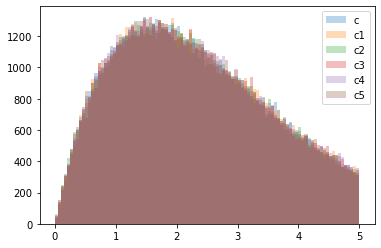

In [7]:
c = np.loadtxt("/home/qtaylor/BH_extremal/change/changes.txt")
c1 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_1.txt")
c2 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_2.txt")
c3 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_3.txt")
c4 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_4.txt")
c5 = np.loadtxt("/home/qtaylor/BH_extremal/change/changes_5.txt")
plt.hist(c, bins = 100, range = (0,5), alpha = 0.3, label = "c")
plt.hist(c1, bins = 100, range = (0,5), alpha = 0.3, label = "c1")
plt.hist(c2, bins = 100, range = (0,5), alpha = 0.3, label = "c2")
plt.hist(c3, bins = 100, range = (0,5), alpha = 0.3, label = "c3")
plt.hist(c4, bins = 100, range = (0,5), alpha = 0.3, label = "c4")
plt.hist(c5, bins = 100, range = (0,5), alpha = 0.3, label = "c5")
plt.legend()
plt.show()

# 100 mp

## Turning on the bias

In [12]:
bias = np.array((0,1,5,10,15,20,25,30,35,40,45,50))
b_array = np.empty((5000,len(bias)))
a1 = np.empty((2000,len(bias)))

for i, val in enumerate(bias):
    x = np.loadtxt(f"/home/qtaylor/BH_extremal/Outputs/bias{val}_M_100.txt", delimiter = ',')
    #a1[:,i] = np.where(np.abs(x[:,4]) == 1)
    b_array[:,i] = x[:,2]

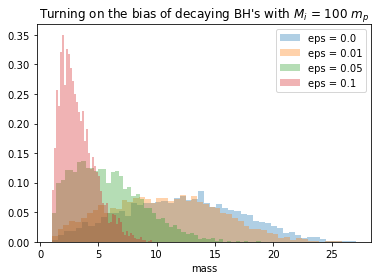

In [40]:
for i, val in enumerate(bias[0:4]):
    plt.hist(b_array[b_array[:,i] > 1,i], bins = 50, density = True, alpha = 0.35, label = f"eps = {val/100}")
plt.legend()
plt.xlabel("mass")
plt.title("Turning on the bias of decaying BH's with $M_i$ = 100 $m_p$")
plt.savefig(f"/home/qtaylor/BH_extremal/Outputs/Bias_Plotsv1.png")
plt.show()

### Zooming in on change

In [3]:
zoom = np.arange(1,11,1)
b2_array = np.empty((5000,len(zoom)))

for i, val in enumerate(zoom):
    x = np.loadtxt(f"/home/qtaylor/BH_extremal/Outputs/bias{val}_M_100.txt", delimiter = ',')
    #a1[:,i] = np.where(np.abs(x[:,4]) == 1)
    b2_array[:,i] = x[:,2]

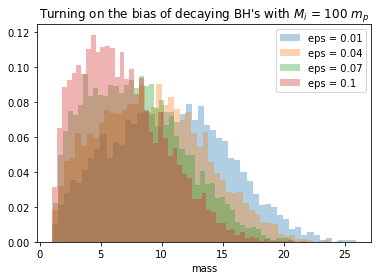

In [51]:
for i, val in enumerate(zoom[::3]):
    plt.hist(b2_array[b2_array[:,i] > 1,i], bins = 50, density = True, alpha = 0.35, label = f"eps = {val/100}")
plt.legend()
plt.xlabel("mass")
plt.title("Turning on the bias of decaying BH's with $M_i$ = 100 $m_p$")
plt.savefig(f"/home/qtaylor/BH_extremal/Outputs/Bias_Plots_zoom.png")
plt.show()

In [54]:
zoom[-1]

10

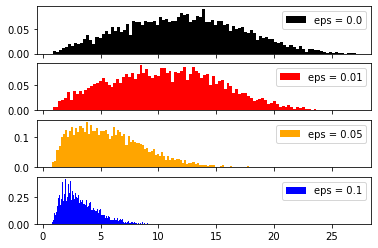

In [21]:
fig, ax = plt.subplots(4, sharex = True)
ax[0].hist(b_array[:,0], bins = 100, density = True, color = 'black', label = f"eps = {bias[0]/100}")
ax[1].hist(b2_array[:,0], bins = 100, density = True, color = 'red', label = f"eps = {zoom[0]/100}")
ax[2].hist(b2_array[:,4], bins = 100, density = True, color = 'orange', label = f"eps = {zoom[4]/100}")
ax[3].hist(b2_array[:,-1], bins = 100, density = True, color = 'blue', label = f"eps = {zoom[-1]/100}")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
#fig.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(f"/home/qtaylor/BH_extremal/Outputs/Bias_Plots_stacked.png")

# 100mp Analysis

In [18]:
mass100 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/M_100.txt", delimiter = ',')
f100 = mass100[:,2]
a100 = np.where(mass100[:,4] == 1)
avg100 = np.mean(f100[a100])
# print("Number of Extremal BH's for M_i = 100 mp:", len(fmass100[a100]))
# print(a100)

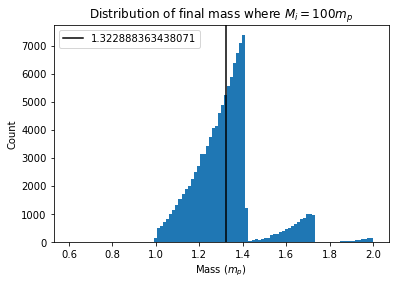

In [7]:
plt.hist(f100[a100], bins = 100, density = False, alpha = 1, range = (0.6,2))
#plt.hist(f100, bins = 100, density = False, color = 'red', alpha = 0.3, range = (0.6,2))
plt.axvline(avg100, color = 'black', label = avg100)
plt.legend()
plt.title("Distribution of final mass where $M_i = 100 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
#plt.savefig("/home/qtaylor/BH_extremal/Outputs/100BH.png")
plt.show()

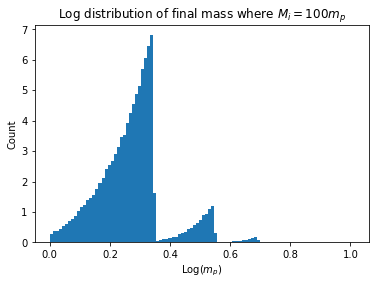

In [8]:
plt.hist(np.log(f100[a100]), bins = 100, density = True)
#plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
#plt.legend()
plt.title("Log distribution of final mass where $M_i = 100 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log100BH.png")
plt.show()

## Finding Eta

/tmp/ipykernel_3407/499861778.py:7: RuntimeWarning: divide by zero encountered in log
  eta[index] = np.log(np.sum(m100[m100 > i]))


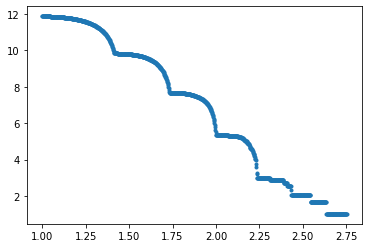

In [48]:
m100 = f100[a100]
max100 = max(m100)
min100 = min(m100)
mprime = np.linspace(min100,max100,1000)
eta = np.empty(1000)
for index, i in enumerate(mprime):
    eta[index] = np.log(np.sum(m100[m100 > i]))
plt.plot(mprime, eta, '.')
#plt.yscale("log")

## Fit

In [96]:
def fit(m, b, a):
    return np.log(b * np.exp(-a * (m - 1)))

[1.e+04 5.e+00] [[0. 0.]
 [0. 0.]]


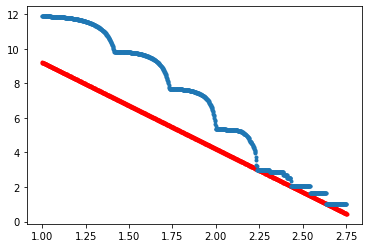

In [102]:
y = fit(mprime, 10000, 5)
popt, pcov = curve_fit(fit, mprime, y)
print(popt, pcov)
plt.plot(mprime, fit(mprime, *popt), 'r.', label = "Curve Fit")
plt.plot(mprime, eta, '.', label = "Data")

# 200 mp

In [5]:
mass200 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/200BH.txt", delimiter = ',')
fmass200 = mass200[:,2]
avg200 = np.mean(fmass200[fmass200 > 1])
print("Number of Extremal BH's for M_i = 200 mp:", len(fmass200))

Number of Extremal BH's for M_i = 200 mp: 3219


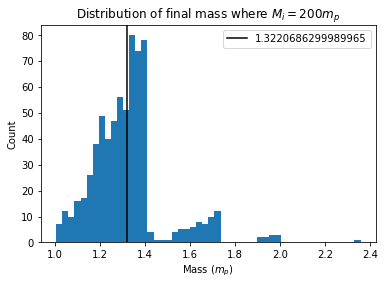

In [6]:
plt.hist(fmass200[fmass200 > 1], bins = 50, density = False)
plt.axvline(avg200, color = 'black', label = avg200 )
plt.legend()
plt.title("Distribution of final mass where $M_i = 200 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/200BH.png")
plt.show()

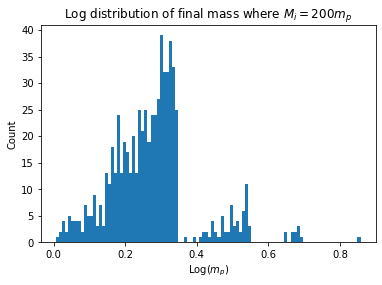

In [7]:
plt.hist(np.log(fmass200[fmass200 > 1]), bins = 100)
#plt.axvline(np.mean(fmass200[fmass200 > 1]), color = 'black', label = np.mean(fmass200[fmass200 > 1]) )
#plt.legend()
plt.title("Log distribution of final mass where $M_i = 200 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log200BH.png")
plt.show()

# 500 mp

In [8]:
mass500 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/500BH.txt", delimiter = ',')
fmass500 = mass500[:,2]
avg500 = np.mean(fmass500[fmass500 > 1])
print("Number of Extremal BH's for M_i = 500 mp:", len(fmass500))

Number of Extremal BH's for M_i = 500 mp: 409


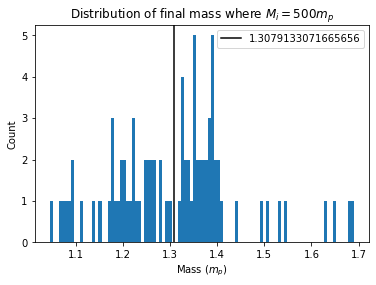

In [9]:
plt.hist(fmass500[fmass500 > 1], bins = 100)
plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
plt.legend()
plt.title("Distribution of final mass where $M_i = 500 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/500BH.png")
plt.show()

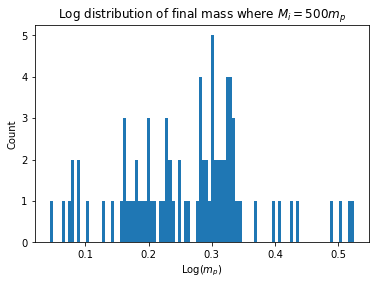

In [10]:
plt.hist(np.log(fmass500[fmass500 > 1]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 500 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log500BH.png")
plt.show()

# 1000 mp

In [2]:
mass1k = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/1000BH.txt", delimiter = ',')
f1k = mass1k[:,2]
a1k = np.where(mass1k[:,4] == 1)
avg1k = np.mean(f1k[a1k])
print("Number of Extremal BH's for M_i = 1000 mp:", len(f1k[a1k]))

OSError: /home/qtaylor/BH_extremal/Outputs/1000BH.txt not found.

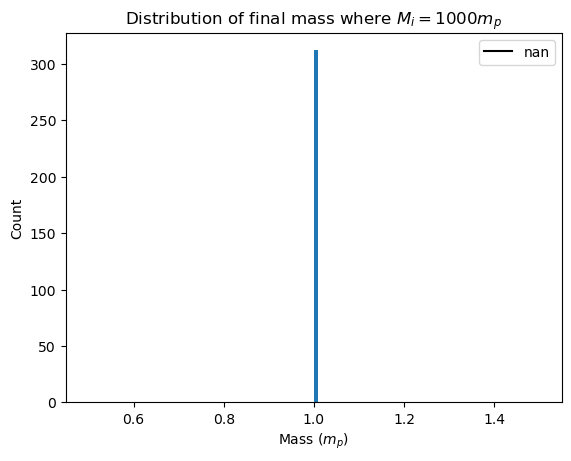

In [55]:
plt.hist(f1k[:], bins = 100, density = False)
plt.axvline(avg1k, color = 'black', label = avg1k)
plt.legend()
plt.title("Distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/1000BH.png")
plt.show()

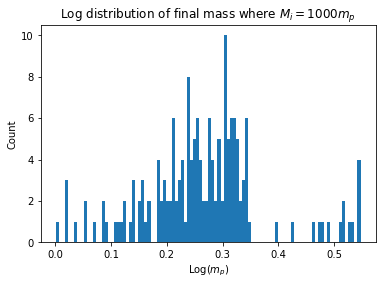

In [13]:
plt.hist(np.log(fmass1k[fmass1k > 1]), bins = 100)
# plt.axvline(np.mean(fmass500[fmass500 > 1]), color = 'black', label = np.mean(fmass500[fmass500 > 1]) )
# plt.legend()
plt.title("Log distribution of final mass where $M_i = 1000 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log1000BH.png")
plt.show()

# 2000 mp

In [14]:
mass2k = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/2000BH.txt", delimiter = ',')
fmass2k = mass2k[:,2]
avg2k = np.mean(fmass2k[fmass2k > 1])
print("Number of Extremal BH's for M_i = 2000 mp:", len(fmass2k))

Number of Extremal BH's for M_i = 2000 mp: 467


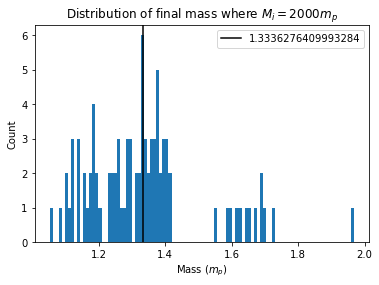

In [15]:
plt.hist(fmass2k[fmass2k > 1], bins = 100)
plt.axvline(avg2k, color = 'black', label = avg2k)
plt.legend()
plt.title("Distribution of final mass where $M_i = 2000 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/2000BH.png")
plt.show()

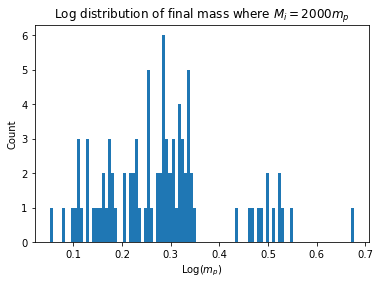

In [16]:
plt.hist(np.log(fmass2k[fmass2k > 1]), bins = 100)
plt.title("Log distribution of final mass where $M_i = 2000 m_p$")
plt.xlabel("Log($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/Log2000BH.png")
plt.show()

# Percentage of extremal mass

In [77]:
P2k = 1-(2000-avg2k)/2000
P1k = 1-(1000-avg1k)/1000
P500 = 1-(500-avg500)/500
P200 = 1-(200-avg200)/200
P100 = 1-(100-avg100)/100

In [78]:
print("Average mass of extremal black hole is", P2k," of the initial mass for m_i = 2000 mp")
print("Average mass of extremal black hole is", P1k," of the initial mass for m_i = 1000 mp")
print("Average mass of extremal black hole is", P500," of the initial mass for m_i = 500 mp")
print("Average mass of extremal black hole is", P200," of the initial mass for m_i = 200 mp")
print("Average mass of extremal black hole is", P100," of the initial mass for m_i = 100 mp")

Average mass of extremal black hole is 0.000666813820499712  of the initial mass for m_i = 2000 mp
Average mass of extremal black hole is 0.0013101156253841895  of the initial mass for m_i = 1000 mp
Average mass of extremal black hole is 0.0026158266143331277  of the initial mass for m_i = 500 mp
Average mass of extremal black hole is 0.006610343149994979  of the initial mass for m_i = 200 mp
Average mass of extremal black hole is 0.013270990348171252  of the initial mass for m_i = 100 mp


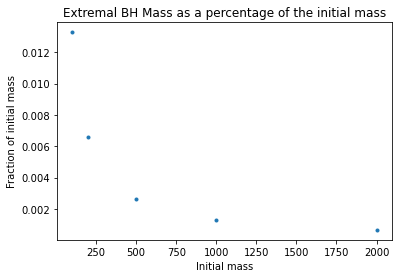

In [79]:
Parray = np.array((P100,P200,P500,P1k,P2k))
Marray = np.array((100,200,500,1000,2000))
plt.plot(Marray, Parray, '.')
plt.title("Extremal BH Mass as a percentage of the initial mass")
plt.xlabel("Initial mass")
plt.ylabel("Fraction of initial mass")
plt.show()

In [113]:
eq100 = np.loadtxt("/home/qtaylor/BH_extremal/Outputs/100BH_eqprob.txt", delimiter = ',')
feq100 = eq100[:,2]
a100eq = eq100[:,4]
a = np.where(a100eq == 1)
avgeq100 = np.mean(feq100[a])

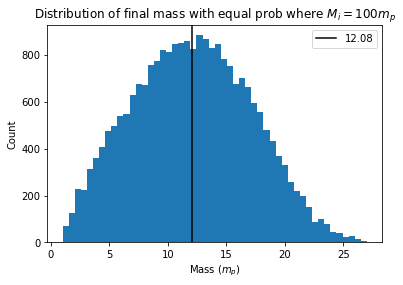

In [130]:
plt.hist(feq100[a], bins = 50, density = False, alpha = 1, range = (1,27))
plt.axvline(avgeq100, color = 'black', label = f'{avgeq100:0.2f}')
plt.legend()
plt.title("Distribution of final mass with equal prob where $M_i = 100 m_p$")
plt.xlabel("Mass ($m_p$)")
plt.ylabel("Count")
plt.savefig("/home/qtaylor/BH_extremal/Outputs/100BH_equalprob.png")
plt.show()

In [120]:
print(feq100[feq100 < 1])

[0.80511267 0.92972236 0.78154174 0.92550206 0.95678587 0.92186225
 0.99853323 0.79911359 0.97166506 0.89428355]


# Tracking Evolution

In [15]:
with open("/home/qtaylor/BH_extremal/Outputs/M_100.txt") as f:
    f.readline()

Object `readlines` not found.


In [17]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  